In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import r2_score,accuracy_score,classification_report

In [86]:
df=pd.read_csv('Social_Network_Ads.csv')
df.drop(columns=['User ID'],inplace=True)

In [87]:
df=df.replace({'Male':0,'Female':1})
df

C:\Users\hp\AppData\Local\Temp\ipykernel_12948\2255486787.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({'Male':0,'Female':1})


,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [88]:
x=df.drop(columns=['Purchased'])
y=df['Purchased']

In [89]:
type(y)

pandas.core.series.Series

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=32)

In [91]:
x_train

,Gender,Age,EstimatedSalary
28,0,29,43000
115,0,40,57000
164,1,33,69000
332,0,42,65000
29,0,31,18000
...,...,...,...
380,0,42,64000
310,1,42,70000
389,1,48,35000
43,0,30,15000


In [92]:
y_train

28     0
115    0
164    0
332    0
29     0
      ..
380    0
310    0
389    1
43     0
215    1
Name: Purchased, Length: 268, dtype: int64

In [93]:
x_test

,Gender,Age,EstimatedSalary
223,0,60,102000
145,1,24,89000
146,1,27,96000
366,1,58,47000
268,1,47,144000
...,...,...,...
316,1,54,104000
308,0,36,125000
254,1,50,44000
170,0,21,88000


In [94]:
y_test 

223    1
145    0
146    1
366    1
268    1
      ..
316    1
308    1
254    0
170    0
80     0
Name: Purchased, Length: 132, dtype: int64

# Training the Model 

In [59]:
clf=DecisionTreeClassifier() 

In [95]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[3,4,5,6,7],
    'max_features':['auto','sqrt','log2'],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1] 
}

In [96]:
from sklearn.model_selection import GridSearchCV

In [99]:
import pickle 
# Load GridSearchCV object
with open('gridsearch_cv.pkl', 'rb') as f:
    loaded_cv = pickle.load(f)

# Load best parameters
with open('best_params.pkl', 'rb') as f:
    loaded_params = pickle.load(f)

# Load best estimator
with open('best_decision_tree.pkl', 'rb') as f:
    loaded_estimator = pickle.load(f)

In [100]:
loaded_params

{'ccp_alpha': 0.01,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [101]:
loaded_estimator

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=4, max_features='log2')

# After Importing Parameters From google Colab---Training the MOdel

In [109]:
clf=DecisionTreeClassifier(ccp_alpha=0.01,criterion='gini',max_depth=4,max_features='log2',splitter='best') 

In [110]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=4, max_features='log2')

In [111]:
y_pred=clf.predict(x_test)

In [112]:
accuracy_score(y_test,y_pred)

0.8257575757575758

In [113]:
r2_score(y_test,y_pred)

0.2748984953427276

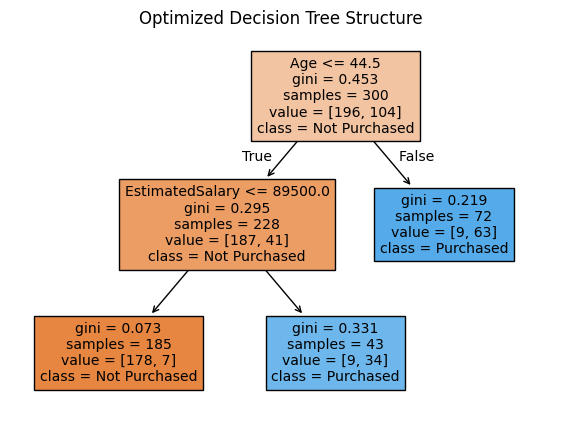

In [124]:
# --- Model Visualization ---
plt.figure(figsize=(7,5))
plot_tree(loaded_estimator, 
          feature_names=df.columns, 
          class_names=['Not Purchased', 'Purchased'], 
          filled=True)
plt.title("Optimized Decision Tree Structure")
plt.savefig('optimized decision tree structure.png')
plt.show()


In [126]:
# --- Model Persistence ---
print("\n💾 Saving trained model...")
with open('optimized_decision_tree.pkl', 'wb') as f:
    pickle.dump(clf, f)


💾 Saving trained model...
